#Lecture 12: Independent Components Analysis

To understand how ICA works, we need to understand information theory.  There is more than one species of information theory;  here I will discuss the theory developed by Claude Shannon while working at Bell Laboratories.

##Random Variables
First step is to look at the concept of Entropy which is a measure of how uncertain we are about a random variable. First step: what is a **random variable**?  Easiest way to think of it is that a random variable is something we can see that responds to the unknown and infinite-dimensional state of the universe.  For example, the true temperature outside right now might be $20*\pi$ degrees Fahrenheit.  But we cannot ever know that because we will spend forever (literally) figuring out all those digits.  Instead we look at our thermometer and see that the temperature is between 62 and 63 degrees.  That is our observation of the unknowable true state of the universe.  Our thermometer might run from 32 to 131 degrees, so each mark on the thermometer represents a *set* of true temperatures.  We label each set with a distinct value $i \in \{ 32, 132\}$ and the set is the set of everything in the universe that could lead to an observation in that range of temperatures $\{ i , i+1\}$.  The random variable $X$ represents the thermometer before we look at it.  So when we say $X=i$ it means that we looked at the thermometer $X$ and we saw that the temperature was $i$ which means truth lies within the set $x_i$.  Yup.  It's that easy.  Just remember the universe has infinite precision but you don't, so all you can see is which set contains the true value.  

##Probability
Now what is a **probability**?  Suppose the universe is arranged so that all possible things are equally (un)likely.  Then the bigger a set, the more chances it can happen.  So probability is the *size* of the set which we call $p(X=x_i)$.  Note how clever this is; the random variable $X$ takes values determined by the universe, so the probability is determined by the universe, not the thermometer markings.  In mathematics we call a probability function $p()$ a "measure" because it measures the size of sets.  The measure is not, on a thermometer for example, the difference between 62 and 63 degrees (which is 1) but the size of the set in the universe of all possible states that could make that thermometer give a reading between 62 and 63 degrees. The size of this set grows larger (in California) in the winter and smaller in the summer.  So sometimes $p(X,t)$ is a function of time.  

[This is not the same thing as a sequence of identically distributed random variables $X(t)$ which just  means that we keep looking at the thermometer and the value keeps changing because the universe is changing.]

Now if the set of all possible things in the universe is $\Omega$ then at least one thing $\omega \in \Omega$ has to happen so $p(\Omega) = 1$.  And all the sets in the universe have to add up to everything, so for any random variable $X$, if $\{ x_i \}$ is the set of all its possible states (meaning that exactly one has to happen; the thermometer has to read *something*) then $\sum_i p(x_i) = 1$ for any random variable where the sets $x_i$ do not overlap (only one can be true at a time).  But what happens if the temperature is off the end of the thermometer?  That's ok; it is still a reading.  It is just that if the thermometer only goes down to 32F and you happen to live in North Dakota, then the observation of a reading at the low limit of the thermometer may be a bigger set (with higher probability measure) than all the others.

If the sets overlap (the thermometer could give you two different readings at the same time?) then really it is the union of the sets that has to add up to 1, so we have $p(\bigcup_i x_i) = 1$.  But this doesn't happen as we will see in a minute.  To be more precise about how the sets work, we can say that the random variable $X$ takes values $i$ (the thermometer readings), and each set $x_i = \{ \omega \in \Omega | X(\omega) = i \}$.  In this case we see that a random variable is actually a function $X(\omega)$ that maps states $\omega \in \Omega$ into integers $i$. Because it is a function, it can take only one value at a time. So the sets $x_i$ do not overlap.  The sets $x_i$ can be thought of as the inverse image of the function $X$.   

OK, now back to probability.  Since $X$ is a function with discrete values $i$, we define the probability $P[X=i]$ as the measure of the inverse image $p(x_i)$ where $p$ maps sets $x_i \subset \Omega$ into real numbers such that $p(\emptyset) = 0$, $p(\Omega)=1$, and $p(x_i \cup x_j) = p(x_i) + p(x_j)$ if $x_i \cap x_j = 0$.  Now you see that this gives the standard rules of probability, because $P[X=i] > 0$ and $\sum_i P[X=i] = 1$.  For shorthand, we typically will write $p(i)$.

##Entropy
OK, why did I do all this to tell you something that seems obvious?  Because now I need to define **entropy**. 
The entropy of $X$ is defined as:
\begin{equation}
  H[X] = \sum_i - p(i) \log p(i)
\end{equation}
You have probably seen this before.  But where does it come from?  Here is an intuitive explanation.  Remember that the expected value of a function $f(i)$ is given by
\begin{equation}
  E[f(X)] = \sum_i p(i) f(i)
\end{equation}
so then we see that the entropy is $H[X] = E[-\log p(X)]$.  In other words, the entropy is the average value of the negative log of the probability.  Why would that make sense?  The simple answer is that the function $\sum_i -p(i)\log p(i)$ is maximized whenever all the probabilities are identical $p(i)=p(j)$ for all $i$ and $j$.  It is minimized whenever $p(i)=1$ for some $i$ (which means $p(j)=0$ for $j\neq i$).  In other words, entropy is zero when you know the right answer, and entropy is maximum when all possibilities are equally likely.  So entropy is a measure of how much you know.

Note that $-\log p(x_i) = \log 1/p(x_i)$ and $1/p(x_i)$ is the total number of items $N$ if all items $x_i$ have equal probability since in that case $p(x_i) = 1/N \Rightarrow N = 1/p(x_i)$.  Then the entropy in this case is just $\log N$ which is the number of "bits" needed to enumerate all the items.  In other words, 256 items each with probability $1/256$ have entropy equal to 8bits.  Entropy is measured in bits. If the probabilities are not all equal, then the entropy will be less than 8 bits.  For instance, if one of the bits is always zero, then there are only 7 bits of entropy.  The more you know, the fewer bits you need.  **The entropy is the average number of bits you need to specify which observation occurred.**

## Information
Now suppose that you know the distribution of temperatures at this time of year $p(i)$ where $i\in (32, 132)$. Now you look at your thermometer and you see that it is 62 degrees, so that $X=62$.  The probability changed from $p(i)$ before, to certainty that $p(62)=1$ after.  So how much did the entropy or uncertainty change?  It went from $H[X] = \sum -p \log p$ to zero.  We call this the *information* you gained from the observation.  In other words, information is the difference in entropy: $H[before] - H[after]$.  Information is how much uncertainty was lost by making the observation.

## Conditional probability
To get to *mutual information* we need one more concept: conditional probability.  Suppose we have another thermometer $Y$ that only gives readings within 5 degrees.  We look at $Y$ first and see that it reads 60 which means the real temperature is between 60 and 65 degrees.  This has given us some information, but there is more to be learned from observing $X$.  But since we already know $Y$, we know that $X$ has to be in the set $\{ 60, 61, 62, 63, 64 \}$.  Those are all the possibilities.  So if $P[X=i|Y=j]$ is the new probability of what we will see on the $X$ thermometer, we still need to observe the laws of probability, so 
\begin{equation}
  \sum_{i=60}^{64} P[X=i | Y= 60] = 1
\end{equation}
In other words, the universe has shrunk. Temperatures outside the range $(60\ldots 65)$ are not longer possible. But we still need all possibilities in the shrunken universe to add to 1.  How do we get this?  We can just divide everything by the size of the new universe, which is the measure $p(\{ \omega | Y(\omega) = 60 \})$, which we can write as $p_Y(60)$. We know that 
\begin{equation}
  P[Y=60] = \sum_{i=60}^{64} P[X=i] 
\end{equation}
because these are all the ways that $Y$ could read 60. So that is the new size of the universe.  And we can make the conditional probability obey the rules by defining:
\begin{equation}
  P[X|Y] = \frac{P[X,Y]}{P[Y]}
\end{equation}
where $P[X,Y]$ is the *joint* probability of $X$ and $Y$ which is the same as the probability of $X$ in this case, because $Y$ is completely determined by $X$.  

To summarize, $P[X|Y]$ and $p(X=i|Y=j)$ tells you the new probability $p_{X|Y}(i)$ that $X=i$ inside each of the smaller universes that occur when $Y=j$.  Then we can define the entropy
\begin{equation}
  h[X|Y=j] = \sum_i -p_{X|j}(i) \log p_{X|j}(i)
\end{equation}
where I wrote $p_{X|j}$ as shorthand for $p(X|Y=j)$.  I wrote this as a little $h$, because the conditional entropy is the average $E_Y[h[X|Y=j]$ over all values of $Y=j$:
\begin{equation}
  H[X|Y] = \sum_{ij} \left( - p_{X|Y}(i,j) \log p_{X|Y}(i,j) \right) p_Y(j)
\end{equation}

Define the joint entropy as
\begin{equation}
  H[X,Y] = \sum - p_{X,Y}(i,j) \log p_{X,Y}(i,j)
\end{equation}
which is just summing over the full joint distribution. 

Here are some basic relations about entropy:
\begin{equation}
  H[X|Y] = H[X,Y] - H[Y] \\
  H[Y|X] = H[X|Y] - H[X] + H[Y]
\end{equation}



##Mutual Information
Okay, now we are finally ready to look at mutual information.  What do we learn about $X$ from observing $Y=j$?  Or, in the world of entropy, how much does the entropy of $X$ decrease from before and after observing $Y$?  You can probably guess the answer:
\begin{equation}
  Info[X;Y=j] = H[X] - H[X|Y=j] \\
  \sum_i - p_X(i) \log p_X(i) - \sum_i -p_{X|j}(i) \log p_{X|j}(i)
\end{equation}
The last step is to average this over all the possible values $Y=j$:
\begin{equation}
  I[X;Y] = \sum_i -p_X(i) \log p_X(i) - \sum_{ij} (-p_{X|Y}(i,j) \log p_{X|Y}(i,j)) p_Y(j) \\
  I[X;Y] = H[X] - H[X|Y]
\end{equation}
This is the mutual information, and it is written with a semicolon because it turns out that 
\begin{equation}
  I[X;Y] = I[Y;X]
\end{equation}
Because mutual information is a difference of entropies, it is also measured in bits.

If $Y=X$, then observing $Y$ tells you $X$ with certainty, so $I[X;Y] = H[X] = H[Y]$ in this case.  On the other hand if $Y$ is independent of $X$, then observing $Y$ tells you nothing about $X$, so $H[X|Y] = H[X]$ and $I[X;Y] = 0$.  This makes sense; "mutual information" tells you how much information each variable can give you about the other.

In the thermometer example, observing $X=62$ on the better thermometer tells you the exact value $Y=60$ that you will observe on the inaccurate thermometer.  So $I[Y;X] = H[Y]$ because you will learn all the information in the poor thermometer from observation of $X$.  But since $I[Y;X] = I[X;Y]$ the most you can learn about the good thermometer from observation of the bad is the entropy in the bad thermometer.  That's the most information it can contribute.

##Independence
I mentioned *independence*.  What does that mean?  $X$ and $Y$ are independent if 
\begin{equation}
  p(X=i,Y=j) = p(X=i)p(Y=j)
\end{equation}
In other words, the probability measures are *separable*.  Why does this make sense?  Well, let's look at the conditional probability:
\begin{equation}
  p(X|Y) = \frac{p(X,Y)}{p(Y)} \\
    = \frac{p(X) p(Y)}{p(Y)} \\
    = p(X)
\end{equation}
so 
\begin{equation}
  H[X|Y] = H[X] \\
  I[X;Y] = 0
\end{equation}
If $X$ and $Y$ are independent,
\begin{equation}
  H[X,Y] = H[X] + H[Y]
\end{equation}
In other words, if two things are independent, then what I don't know about about both of them is the sum of what I don't know about each of them. 

Mutual information is a very powerful concept.  It turns out that **$I[X;Y]=0$ if and only if $X$ and $Y$ are independent**.  That is a big deal.  If there is *any* way that you could learn about $X$ from observing $Y$, then $I[X;Y] \neq 0$.  It doesn't mean you can figure this out, but it means it is possible somehow.  

Because $H[X|Y] = H[X,Y] - H[Y]$, we can write mutual information as
\begin{equation}
  I[X;Y] = \left( H[X] + H[Y] \right) - H[X,Y]
\end{equation}
which makes sense because the right side is zero if $X$ and $Y$ are independent.  But you can think of this as the difference between the entropy of $X$ and $Y$ if they were independent $H[X] + H[Y]$ (the sum of the "marginal" entropies), and the true joint entropy $H[X,Y]$.  This makes sense.  Mutual information says how "not independent" two variables are.

Why is all this important?  Because there are many ways to train a network to increase mutual information.  One way is to directly measure the mutual information.  Another is to maximize the difference between the joint entropy and the sum of the marginal entropies of the individual variables.  

##Function Approximation
In particular, you could think that if $I[X;Y] \neq 0$ then there exists some network function $f()$ such that $X \approx f(Y)$.  If you find the best function $f(X)$, then the error $X-f(Y)$ cannot have any mutual information with $Y$ (otherwise you could predict the error and reduce it).  So the best (nonlinear) approximation $X\approx f(Y)$ satisfies the orthogonality condition
\begin{equation}
  I[X-f(Y);Y] = 0
\end{equation}
and therefore the error is independent of the estimator
\begin{equation}
  p(X-f(Y), Y) = p(X-f(Y))p(Y)
\end{equation}
Note that you cannot increase the amount of information by using the function $f$; all this function does is map values $j$ into values $i$ so that the subtraction makes sense. This is called the *information processing theorem*.  You cannot increase information by using a computer (but you can decrease information).  For example, suppose that $X=2Y+\eta$ where $\eta$ is noise.  Then clearly there is mutual information between $X-Y$ and $Y$, but there is no mutual information between $X-2Y$ and $Y$.  


##INFOMAX
The term "infomax" was (I think) originally coined by Ralph Linsker as a principle for unsupervised learning. The idea is that if you encode a variable $X$ in another variable $Y$ but you don't know what you will do with $Y$, you should try to preserve as much information as you can about $X$.  This means maximizing $I[X;Y]$.  This becomes particularly relevant when $Y$ cannot hold all the information in $X$, perhaps because it has reduced dimensionality or is quantized or categorized or something that limits its storage.  Then $I[X;Y] < H[X]$ and the goal is to do as well as you can by maximizing the mutual information.  Because of the information processing theorem , the information that was lost in conversion of $X$ to $Y$ can never be recovered by subsequent processing in a network. So the goal is to preserve as much information as possible until you know what it will be used for.

What does that mean?  Well suppose that I tell you later that what I really want to do is to approximate some random variable $Z$.  The network is calculating $X \rightarrow Y \rightarrow Z$, and $Y$ was chosen to maximize $I[X;Y]$.  But that does not mean that the network as a whole will maximize $I[X;Z]$ which is what would be needed to get the best estimate of $Z$.  That is the curse of unsupervised learning; you don't know what you want at the beginning.  Infomax is not a bad idea, particularly if many different random variables $Z_k$ may be chosen in the future (or all at once).  But if you did know $Z$ at the beginning you should choose $Y$ to maximize $I[X;Z]$.

##INFOMAX vs. VARIMAX
Linsker's original discussion of "Infomax" was actually for a linear network that maximized variance, so subsequently people called that Varimax.  But what is the relationship?  For a Gaussian signal $x$ with additive gaussian noise $n$ and output $y=x+n$, the mutual information between $y$ and $x$ is given by 
\begin{equation}
  I[y;x] = \frac{1}{2} \log \left(1 + \frac{E[x^2]}{E[n^2]} \right)
  \end{equation}
where $E[x^2]/E[n^2]$ is the signal-to-noise ratio (SNR).  Now think of a hidden layer $y\in R^M$ encoding an input $x \in R^N$ where $N>M$ not as deleting the $N-M$ unencoded inputs, but as adding just enough noise to them to make them useless (or zero), so $n=x-y$.  So now the SNR is $E[x^2]/E[(x-y)^2]$ and our goal is to minimize the denominator.  Note that we want $y=Wx$ to be orthogonal to $x-y$ otherwise we could reduce error further, so $E[(x-y)^2] = E[x^2] - E[xy]$ and the mutual information is:
\begin{equation}
  I[y;x] = \frac{1}{2} \log \left(1 + \frac{E[x^2]}{E[x^2]-E[xy]} \right)
\end{equation}
so the goal is to maximize $E[xy]$ which occurs when the rows of the weight matrix $W$ are the first $M$ eigenvectors of $R_{xx}$, which leads to maximum output variance.

So the "Infomax" principal leads to the "Varimax" solution in the case of a linear autoencoder and Gaussian variables.


#FastICA example

I took this off the web. It seemed the clearest and simplest.

https://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_blind_source_separation.html

In [27]:
#The usual preamble
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

import seaborn as sns
import tensorflow as tf
from scipy import signal

from sklearn.decomposition import FastICA, PCA

#for your homework
np.random.seed(10327798)
tf.random.set_seed(10327798)


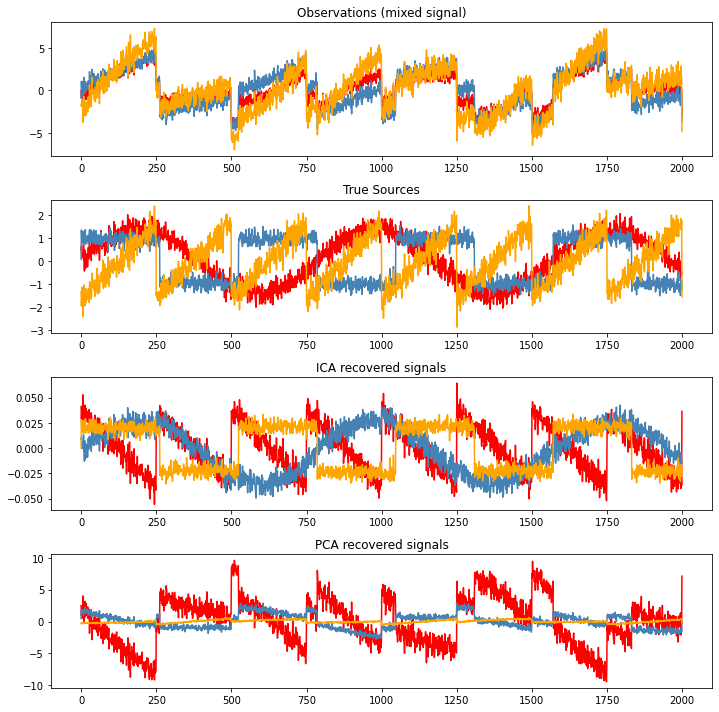

In [28]:

# #############################################################################
# Generate sample data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

# Compute ICA - this cannot be done in a sequential tensorflow model
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components

# #############################################################################
# Plot results

plt.figure(figsize=(10,10))

models = [X, S, S_, H]
names = [
    "Observations (mixed signal)",
    "True Sources",
    "ICA recovered signals",
    "PCA recovered signals",
]
colors = ["red", "steelblue", "orange"]

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4,1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()

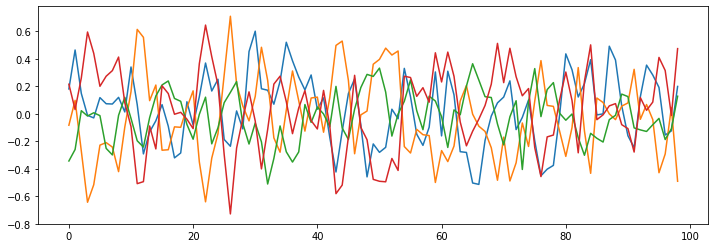

In [29]:
#create a multi-dimensional signal from filtered white noise as in Lecture11
#here is the random number generator
from numpy.random import default_rng
from numpy import linalg as LA

rng = default_rng()
nTimes = 10000
nDims = 4
FIR_filter = [1,2,3,2,1,-1,1]   # put some time-domain smoothing here
FIR_filter = FIR_filter / np.sum(FIR_filter)

#first, produce a smoothed set of independent random channels
sim_data = np.zeros((nTimes,nDims))
for d in range(0,nDims):
  #random_signal = rng.standard_normal(nTimes)  #standard gaussian mean =0 std = 1
  random_signal = rng.uniform(low=-1.0, high=1.0, size=nTimes)  #standard gaussian mean =0 std = 1
  filtered_signal = np.convolve(random_signal, FIR_filter[d:d+3], 'same') 
  sim_data[:,d] = filtered_signal   #one-dimensional slightly smoothed noise on each channel
#sim_data /= sim_data.std()  #this now has nDims channels, each independent of the others.
S = sim_data  #the original independent channels

#now introduce some correlations through a mixing matrix
A = rng.uniform(low=-1.0, high=1.0, size=(nDims,nDims))
X = np.dot(S,A.T)    #apply this to the independent data streams to generate a correlated signal


plt.figure(figsize=(12,4), linewidth = 1)
plt.plot(X[1:100,0:10]);  #signals often rise and fall together.

In [30]:
# Compute ICA
ica = FastICA(n_components=nDims)
S_hat = ica.fit_transform(X)  # Reconstruct signals
A_hat = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_hat, A_hat.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=4)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components


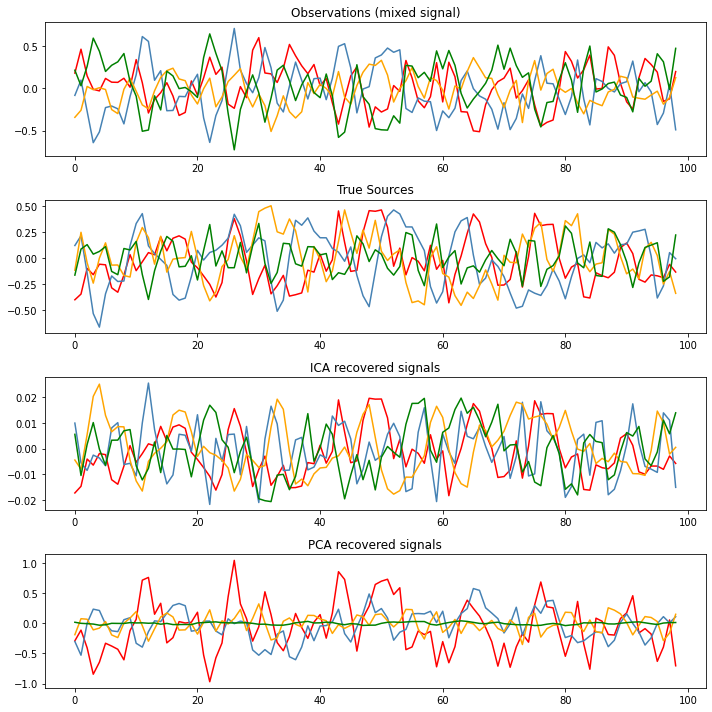

In [31]:
plt.figure(figsize=(10,10))
xc =S_hat.T @ S
permute = np.argmax(np.abs(xc),axis=1)
S_hat_permute = S_hat[:,permute]
S_hat_fixedsign = S_hat @ np.diag(np.sign(np.diag(S_hat_permute.T @ S)))
models = [X, S, S_hat_fixedsign, H]
names = [
    "Observations (mixed signal)",
    "True Sources",
    "ICA recovered signals",
    "PCA recovered signals",
]
colors = ["red", "steelblue", "orange","green"]

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4,1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig[1:100], color=color)

plt.tight_layout()
plt.show()

#Brain data

I have some recordings from the brains of children undergoing surgery. Here we will use three channels coming from 3 different electrodes in the Globus Pallidus Internus (GPi) of a child with dystonia. These three channels are very close to each other and are likely all "listening" to the same groups of neurons.  ICA could be used to separate out the neural sources and eliminate the crosstalk in the channels.   You will need to store and then load the file "micro123.csv" from your google drive.

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


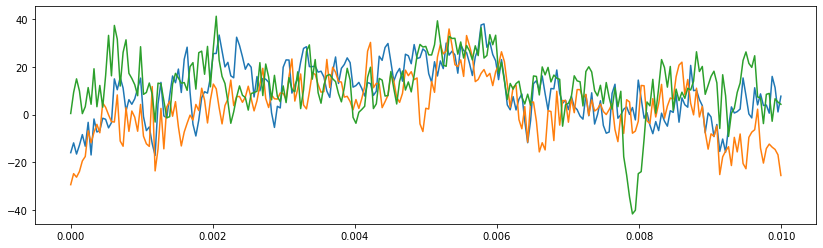

In [35]:
#load the sample Brain data
#3 channels from GPi, each in microvolts.  sampling at 24.414kHz
micro123 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/micro123.csv', names=['ch1','ch2','ch3'])
samplingFrequency = 24414
nPoints = len(micro123)
maxTime = nPoints/samplingFrequency
ts_index = np.linspace(start= 0 ,stop=maxTime, num= nPoints)
dfMic = pd.DataFrame(micro123.values, index = ts_index)
plt.figure(figsize=(14,4))
plt.plot(dfMic[0:.01]);

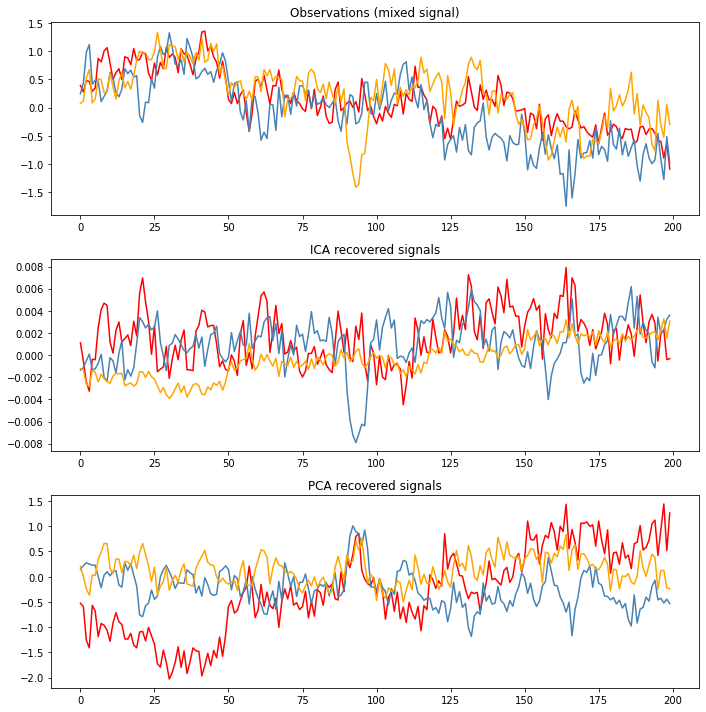

In [36]:
#do the ICA on the Brain data
X = micro123.values
X /= X.std(axis=0)  # Standardize data

# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components

# #############################################################################
# Plot results

plt.figure(figsize=(10,10))

models = [X, S_, H]
names = [
    "Observations (mixed signal)",
    "ICA recovered signals",
    "PCA recovered signals",
]
colors = ["red", "steelblue", "orange"]

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(3,1, ii)
    plt.title(name)
    for sig, color in zip(model[100:300,:].T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()

#Homework 7

Load the EEG dataset from lecture 5.  It has 14 channels at each time point.  
1. Calculate the ICA of the 14 channels and plot the 14 ICA results for 200 time points.
2. Calculate the PCA with 4 outputs, then calculate the ICA of the resulting 4 output timeseries and plot the 4 ICA results for 200 time points.
3. Can you draw any conclusions from looking at these?  